# Introduction

This notebook is a quick introduction to the GIZ NLP Agricultural Keyword Spotter challenge on Zindi. We'll take a peek at the data, fit a quick (bad) model and make a submission. Let's get going!

# Data Augmentation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
len(os.listdir('drive/My Drive/ZINDI/data/audio_augmented'))

In [ ]:
%cd '/content'

/content


In [ ]:
!pwd

/content


In [ ]:
# Copy the files in and unzip
!cd ..
!cp 'drive/My Drive/data/audio_files.zip' audio_files.zip
!unzip -q audio_files.zip

cp: cannot stat 'drive/My Drive/data/audio_files.zip': No such file or directory
unzip:  cannot find or open audio_files.zip, audio_files.zip.zip or audio_files.zip.ZIP.


In [3]:
!pip install nlpaug

     |████████████████████████████████| 389kB 5.4MB/s 


In [13]:
import nlpaug
import nlpaug.augmenter.audio as naa
from nlpaug.util.audio.visualizer import AudioVisualizer
import librosa
import librosa.display as librosa_display
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd

import os
from tqdm.notebook import tqdm
pd.set_option('display.max_colwidth', None)

In [ ]:
file_path = 'drive/My Drive/data/audio_files/KM4SKWT.wav'
sr = 44100
data, sr = librosa.load(file_path, sr=sr)
ipd.Audio(file_path)

FileNotFoundError: ignored

In [ ]:
sr=44100
# Funktion um audio Dateien zu augmentieren 
def aug_pitch(file_path, sr=44100, factor=(2,3)):
  data, sr = librosa.load(file_path, sr=sr)
  aug = naa.PitchAug(sampling_rate=sr, factor=factor)
  augmented_data = aug.augment(data)
  return(augmented_data)

def aug_noise(file_path, sr=44100):
  data, sr = librosa.load(file_path, sr=sr)
  aug = naa.NoiseAug(color='white', zone=(0.0, 1.0))
  augmented_data = aug.augment(data)
  return(augmented_data)

def aug_shift(file_path,sr=44100):
  data, sr = librosa.load(file_path, sr=sr)
  aug = naa.ShiftAug(sampling_rate=sr, duration=0.5, shift_direction='left')
  augmented_data = aug.augment(data)
  return(augmented_data)

def aug_speed(file_path,sr=44100):
  data, sr = librosa.load(file_path, sr=sr)
  aug = naa.SpeedAug(factor=(0.3,0.7),coverage=0.5)
  augmented_data = aug.augment(data)
  return(augmented_data)


# librosa_display.waveplot(data, sr=sr, alpha=0.5)
# librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

# plt.tight_layout()
# plt.show()

In [ ]:
import scipy.io.wavfile as wavf

#out_f = 'drive/My Drive/data/output/out.wav'
#wavf.write(out_f, sr, augmented_data)

In [ ]:
ipd.Audio(out_f)

In [ ]:
# # combining 4 loops into 1
# # Watch out, the paths are not correct yet
# for function in (aug_noise, aug_pitch, aug_shift, aug_speed):
#   for filename in tqdm(os.listdir('drive/My Drive/ZINDI/data/audio_train/')):
#     path = 'drive/My Drive/ZINDI/data/audio_train/' + filename
#     augmented_data = function(path)
#     out = 'drive/My Drive/data/output/' + function.__name__ + filename 
#     wavf.write(out, sr, augmented_data)

# for filename in tqdm(os.listdir('/content/drive/My Drive/ZINDI/data/audio_train/')):
#  path = 'drive/My Drive/ZINDI/data/audio_train/' + filename
#  augmented_data = aug_noise(path)
#  out = '/content/drive/My Drive/ZINDI/data/audio_augmented/noise/' + 'aug-noise-' + filename 
#  wavf.write(out, sr, augmented_data)

# for filename in tqdm(os.listdir('/content/drive/My Drive/ZINDI/data/audio_train/')):
#  path = 'drive/My Drive/ZINDI/data/audio_train/' + filename
#  augmented_data = aug_pitch(path)
#  out = '/content/drive/My Drive/ZINDI/data/audio_augmented/pitch/' + 'aug-pitch-' + filename 
#  wavf.write(out, sr, augmented_data)

# for filename in tqdm(os.listdir('/content/drive/My Drive/ZINDI/data/audio_train/')):
#   path = 'drive/My Drive/ZINDI/data/audio_train/' + filename
#   augmented_data = aug_shift(path)
#   out = '/content/drive/My Drive/ZINDI/data/audio_augmented/shift/' + 'aug-shift-' + filename 
#   wavf.write(out, sr, augmented_data)

for filename in tqdm(os.listdir('/content/drive/My Drive/ZINDI/data/audio_train/')):
 path = 'drive/My Drive/ZINDI/data/audio_train/' + filename
 augmented_data = aug_speed(path)
 out = '/content/drive/My Drive/ZINDI/data/audio_augmented/speed/' + 'aug-speed-' + filename 
 wavf.write(out, sr, augmented_data)

In [ ]:
# Verify augmentation

print(len(os.listdir('/content/drive/My Drive/ZINDI/data/audio_augmented/speed/')))

4709


# Getting Set Up

You'll need the files from Zindi, but the actual audio files are also available via this drive link: https://drive.google.com/file/d/1IGp1lDi0RIEuE7xuhCVIxEUROuEn-Ucv/view?usp=sharing

So I'd suggest uploading Train.csv and SampleSubmission.csv and then mounting your drive and copying in the files as shown here:

In [ ]:
!ls

sample_data


In [ ]:
# Copy the files in and unzip
!cp 'drive/My Drive/audio_files.zip' audio_files.zip
!unzip -q audio_files.zip

cp: cannot stat 'drive/My Drive/audio_files.zip': No such file or directory
unzip:  cannot find or open audio_files.zip, audio_files.zip.zip or audio_files.zip.ZIP.


In [ ]:
!ls # Check the other files (train and sample sub)

audio_files	 drive	      SampleSubmission.csv
audio_files.zip  sample_data  Train.csv


We'll also need a few libraries. Run these cells to install. You may then need to restart the runtime.

In [ ]:
!pip install -q fastai fastcore --upgrade # Make sure we have the new version

     |████████████████████████████████| 194kB 9.0MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 


In [ ]:
!pip install -q python_speech_features

# First Look

This is an audio classification task, and it's a hard one! Each audio file is a recording of someone saying a key word or phrase. Let's look at the train file and listen to a few random samples

In [ ]:
import pandas as pd
import IPython.display as ipd
pd.set_option('display.max_colwidth', -1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train = pd.read_csv('/content/drive/My Drive/ZINDI/train_full.csv')
# Adjust name
train['fn'] = train['fn'].str.replace('audio_train/', 'audio_files/')
train['fn'] = train['fn'].str.replace('audio_files/', '/content/drive/My Drive/ZINDI/data/audio_train/')
train.tail()

,fn,label
4704,/content/drive/My Drive/ZINDI/data/audio_train/d027264654b94950aeb204f64d05d8d7_8bff3ffdac9e409db5a5ff83f0c557e4.wav,sikungula
4705,/content/drive/My Drive/ZINDI/data/audio_train/d027264654b94950aeb204f64d05d8d7_a39f129a06af41e7acb121a108ad5d8f.wav,sikungula
4706,/content/drive/My Drive/ZINDI/data/audio_train/d027264654b94950aeb204f64d05d8d7_c4aecc275fad4309b83bd2f8c43d624d.wav,sikungula
4707,/content/drive/My Drive/ZINDI/data/audio_train/d027264654b94950aeb204f64d05d8d7_f0aeba9bc00c4df5b39b2766c9dbd2fe.wav,sikungula
4708,/content/drive/My Drive/ZINDI/data/audio_train/d027264654b94950aeb204f64d05d8d7_f5ce29d8dee84c83913066b9cde5bb41.wav,sikungula


In [ ]:
# Show a sample to listen to
ipd.Audio(train.fn.sample().values[0])

Our task is to predict which word is being spoken for some un-labeled recordings (the test set). To submit our predictions we much follow the submission format:

In [6]:
ss = pd.read_csv('/content/drive/My Drive/ZINDI/SampleSubmission.csv')
ss.head()

,fn,maize streak virus,disease,okukkoola,muwogo,mpeke,mucungwa,greens,garden,mango,bulimi,obuwuka,ebikoola,obulimi,ebisoolisooli,kaamulali,eddagala,beans,omuyembe,leaf,kisaanyi,leaves,butterfly,okuzifuuyira,micungwa,ppaapaali,emboga,kikolo,harvest,olusuku,coffee,super grow,rice,ensujju,okulima,worm,ebbugga,onion,ensigo,plantation,...,ejjobyo,omulimi,okusimba,sweet potatoes,okufuuyira,farming instructor,nnasale beedi,passion fruit,ekitooke,ebisaanyi,ekyeya,enva endiirwa,emisiri,emiyembe,amatooke,ebiwuka,farm,ebinyebwa,amappapaali,ebimera,kassooli,harvesting,emmwanyi,akamonde,obumonde,cabbages,akasaanyi,spread,ebirime,drought,kasaanyi,suckers,insects,fertilizer,nakavundira,ekiwojjolo,akawuka,ddagala,ebiwojjolo,obutungulu
0,audio_files/00118N3.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,audio_files/00P0NMV.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,audio_files/01QEEZI.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,audio_files/037YAED.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,audio_files/0382N0Y.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


For each file we must submit probabilities - how likely we think it is that each keyword is the one being spoken in the audio file. Now, this sounds pretty easy (speech recognition has been around for a while) but what makes this harder is the dataset size - a constraint that is often encountered when dealing with languages other than English. The recordings are also fairly low quality. Let's see how many training examples we have for each word:

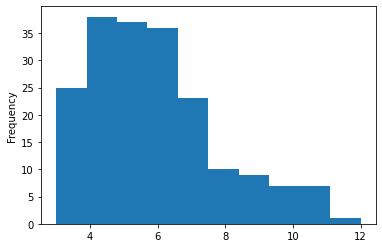

In [ ]:
# Plot a histogram showing how common different counts are
train.groupby('label').count()['fn'].plot(kind='hist')

In [ ]:
train.groupby('label').count()['fn'].min()

3

You can see that for many words we only have 3 or 4 training examples! And even the most common words only have 10 or 12 examples. Now, this will change: as the competition progresses we're hoping to get a bit more data from the project. But even so, your solution will need to get creative in terms of how you deal with this constraint.

# Where do we begin?

So how do we even think about approaching this sort of challenge? There are a few ways - here we'll show one of the most popular. We'll convert the audio files into a 2D image called a spectrogram, which shows the sound intensity at different frequencies over time. We'll use these image representations as the inputs to a neural network. This approach doesn't do very well out of the box here, but hopefully it's enough to get you thinking of better ideas!

To help us with this we'll use a few useful libraries:
- fastai to give us a powerful framework for deep learning
- librosa for audio processing

Let's start by making a function to turn an audio file into an image:

In [ ]:
import librosa
import python_speech_features as psf
from matplotlib import pyplot as plt
import numpy as np

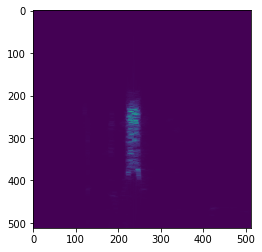

In [ ]:
def im_from_audio(fn, sample_rate=44100, window_length=0.05, window_step=0.0045, NFFT=2205):
  
  # Load the audio into an array (signal) at the specified sample rate
  signal, sr = librosa.load(fn, sr=sample_rate)

  # preemphasis
  signal = psf.sigproc.preemphasis(signal, coeff=0.95)

  # get specrogram
  # Get the frames
  frames = psf.sigproc.framesig(signal, 
                                  window_length*sample_rate, 
                                  window_step*sample_rate, 
                                  lambda x:np.ones((x,)))        # Window function 
    
  # magnitude Spectrogram
  spectrogram = np.rot90(psf.sigproc.magspec(frames, NFFT))
  
  # get rid of high frequencies
  spectrogram = spectrogram[512:,:]

  # normalize in [0, 1]
  spectrogram -= spectrogram.min(axis=None)
  spectrogram /= spectrogram.max(axis=None)        

  # Clip to max 512, 512
  spectrogram = spectrogram[:512, :512]
  
  return spectrogram 

# View the resultant image
plt.imshow(im_from_audio(train.fn.sample().values[0]))

In [ ]:
# Check the shape. For some, we may need to pad to make the full 512 width
im_from_audio(train.fn.sample().values[0]).shape

(512, 512)

# Feeding this into fastai

You could save these spectrograms as images and use a library of your choice. But with fastai v2 we can use the datablock API to make a custom data loader that will read the audio file, create the spectrograms and prepare that for training:

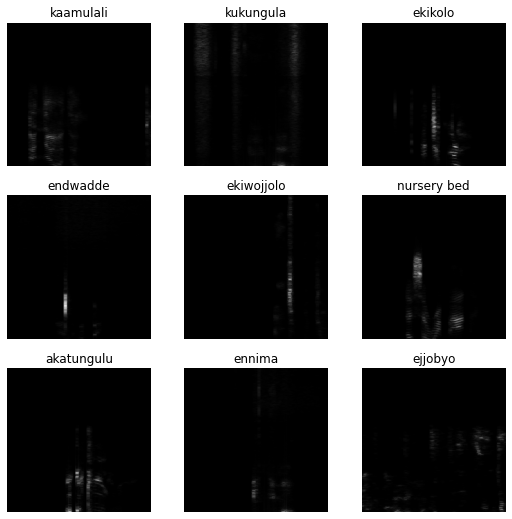

In [ ]:
from fastai.vision.all import *

def get_x(fn):

  # Use our function from earlier
  spectrogram = im_from_audio(fn) # a 2D array

  # Pad to make sure it is 512 x 512
  w, h = spectrogram.shape
  spectrogram = np.pad(spectrogram, [(0, 512-w), (0, 512-h)])

   # Scale to (0, 255)
  spectrogram  -= spectrogram.min()
  spectrogram *= 255.0/spectrogram.max()

  # Make it uint8
  im_arr = np.array(spectrogram, np.uint8)

  # Make it rgb (hint - some fun tricks you can do here!)
  r = im_arr
  g = im_arr
  b = im_arr

  return np.stack([r, g, b], axis=-1)

def get_y(fn):
  return train.loc[train.fn == fn].label.values[0]

def get_fns(_):
  return train['fn']

# And build the datablock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_fns,
    get_x=get_x,
    get_y=get_y, 
    splitter=RandomSplitter(valid_pct=0.1),
    batch_tfms=aug_transforms(do_flip=False, p_affine=0, size=224) # Augment with lighting changes but NOT flips or warps
)
dls = dblock.dataloaders(Path(''), bs=32)
dls.show_batch()

Look at that! Inputs and the associated outputs, a 10% validation set, resizing to a smaller size (224px) to speed up modelling... we're ready to train!

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy, top_k_accuracy])
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,6.350332,4.970503,0.042553,0.134043,40:31


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,4.993559,4.315014,0.100000,0.285106,48:25
1,3.955293,3.981757,0.131915,0.357447,47:48


In [ ]:
type(learn)

fastai.learner.Learner

# Saving Our Predictions

In [14]:
ss = pd.read_csv('/content/drive/My Drive/ZINDI/SampleSubmission.csv')
ss.head()


# Adjust name
ss['fn'] = ss['fn'].str.replace('audio_files/', '/content/drive/My Drive/ZINDI/data/audio_test/')
ss['fn'].head()

0    /content/drive/My Drive/ZINDI/data/audio_test/00118N3.wav
1    /content/drive/My Drive/ZINDI/data/audio_test/00P0NMV.wav
2    /content/drive/My Drive/ZINDI/data/audio_test/01QEEZI.wav
3    /content/drive/My Drive/ZINDI/data/audio_test/037YAED.wav
4    /content/drive/My Drive/ZINDI/data/audio_test/0382N0Y.wav
Name: fn, dtype: object

In [8]:
# Create list of paths to test files

d = '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/'
paths = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        paths.append(full_path)

In [10]:
paths[:5]

['/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/0L47WFH-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/0MV7LQS-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/0N7JNLT-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/0OTDVG8-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/0PMQWEQ-spectrogram.png']

In [19]:
sorted(paths)[:5]

['/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/00118N3-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/00P0NMV-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/01QEEZI-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/037YAED-spectrogram.png',
 '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/0382N0Y-spectrogram.png']

In [18]:
# Create list of paths to test files
d = '/content/drive/My Drive/ZINDI/data_new_order/spectrogram_test/'
paths = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        paths.append(full_path)

# create arrays from test images
img_array = []
for p in tqdm(paths):
  img = tf.keras.preprocessing.image.load_img(p, target_size=(256, 256))

  img = tf.keras.preprocessing.image.img_to_array(img)
  img_array.append(img)  
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

KeyboardInterrupt: ignored

In [ ]:
tdl = learn.dls.test_dl(ss['fn'].values, order=True) # Create a test dataloader
test_preds, test_labels = learn.get_preds(dl=tdl) # Make the predictions
test_preds[0] # Look at an example

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


TensorImage([4.1337e-03, 2.4269e-03, 1.6455e-02, 3.8562e-03, 4.0563e-04, 1.9719e-03,
        9.4157e-04, 9.4353e-04, 4.2688e-04, 3.5934e-04, 3.0883e-04, 7.5883e-03,
        2.7672e-03, 5.7319e-04, 3.8998e-03, 1.3290e-04, 3.5884e-03, 2.0629e-03,
        2.7555e-04, 5.4217e-03, 2.4193e-03, 4.1472e-03, 3.6914e-03, 1.3204e-03,
        1.7676e-03, 2.6344e-03, 3.9439e-03, 1.3212e-03, 1.0379e-03, 3.0428e-03,
        8.2406e-04, 4.2207e-03, 6.5442e-04, 1.7635e-03, 1.8860e-04, 1.0993e-03,
        3.4514e-03, 2.6247e-03, 1.6107e-02, 4.6913e-02, 1.5828e-03, 7.4393e-03,
        7.1867e-02, 1.2156e-02, 6.6959e-03, 1.1235e-03, 6.6897e-03, 8.3170e-04,
        4.3543e-03, 6.2027e-03, 6.6940e-04, 2.7342e-03, 1.5965e-03, 1.1741e-03,
        2.2249e-04, 1.4271e-03, 1.4040e-03, 4.6024e-04, 5.6234e-03, 1.5148e-02,
        3.0999e-03, 2.1168e-04, 3.1051e-03, 1.8322e-03, 1.1238e-03, 5.4324e-04,
        6.0494e-03, 1.1541e-03, 8.5445e-04, 4.9417e-03, 4.2681e-02, 9.7337e-03,
        1.2654e-03, 4.0364e-03, 9.2

In [ ]:
dls.vocab # The class names

['Pump', 'Spinach', 'abalimi', 'afukirira', 'agriculture', 'akammwanyi', 'akamonde', 'akasaanyi', 'akatunda', 'akatungulu', 'akawuka', 'amakoola', 'amakungula', 'amalagala', 'amappapaali', 'amatooke', 'banana', 'beans', 'bibala', 'bulimi', 'butterfly', 'cabbages', 'cassava', 'caterpillar', 'caterpillars', 'coffee', 'crop', 'ddagala', 'dig', 'disease', 'doodo', 'drought', 'ebbugga', 'ebibala', 'ebigimusa', 'ebijanjaalo', 'ebijjanjalo', 'ebikajjo', 'ebikolo', 'ebikongoliro', 'ebikoola', 'ebimera', 'ebinyebwa', 'ebirime', 'ebisaanyi', 'ebisooli', 'ebisoolisooli', 'ebitooke', 'ebiwojjolo', 'ebiwuka', 'ebyobulimi', 'eddagala', 'eggobe', 'ejjobyo', 'ekibala', 'ekigimusa', 'ekijanjaalo', 'ekikajjo', 'ekikolo', 'ekikoola', 'ekimera', 'ekirime', 'ekirwadde', 'ekisaanyi', 'ekitooke', 'ekiwojjolo', 'ekyeya', 'emboga', 'emicungwa', 'emisiri', 'emiyembe', 'emmwanyi', 'endagala', 'endokwa', 'endwadde', 'enkota', 'ennima', 'ennimiro', 'ennyaanya', 'ensigo', 'ensiringanyi', 'ensujju', 'ensuku', 'ensuk

In [ ]:
# Save the predictions in the required format
for i, label in enumerate(dls.vocab):
  ss[label] = [t[i].numpy() for t in test_preds]
ss.head()

,fn,maize streak virus,disease,okukkoola,muwogo,mpeke,mucungwa,greens,garden,mango,bulimi,obuwuka,ebikoola,obulimi,ebisoolisooli,kaamulali,eddagala,beans,omuyembe,leaf,kisaanyi,leaves,butterfly,okuzifuuyira,micungwa,ppaapaali,emboga,kikolo,harvest,olusuku,coffee,super grow,rice,ensujju,okulima,worm,ebbugga,onion,ensigo,plantation,...,ejjobyo,omulimi,okusimba,sweet potatoes,okufuuyira,farming instructor,nnasale beedi,passion fruit,ekitooke,ebisaanyi,ekyeya,enva endiirwa,emisiri,emiyembe,amatooke,ebiwuka,farm,ebinyebwa,amappapaali,ebimera,kassooli,harvesting,emmwanyi,akamonde,obumonde,cabbages,akasaanyi,spread,ebirime,drought,kasaanyi,suckers,insects,fertilizer,nakavundira,ekiwojjolo,akawuka,ddagala,ebiwojjolo,obutungulu
0,/content/drive/My Drive/ZINDI/data/audio_test/00118N3.wav,0.00086349447,0.0030428115,0.009609974,0.00094306003,0.0011413243,0.0023607477,0.0027127797,0.018021598,0.002733198,0.005421658,0.0044948403,0.0015827533,0.03060544,0.006689651,0.001519717,0.0027341763,0.0020629447,0.008454608,0.0026044932,0.00048409897,0.0015486262,0.002419303,0.0082893735,0.0005292893,0.0018380884,0.0011541155,0.0029164462,0.00032848216,0.0024653808,0.002634439,0.0008412419,0.0037795384,0.0001941331,0.0042176195,0.0008705575,0.0006544205,0.004934086,0.0061891214,0.00052967283,...,0.0011740809,0.0023610736,0.0026137275,0.001350117,0.014176914,0.001390395,0.0037466467,0.0015642503,0.0011238038,0.0066959285,0.0060493955,0.0010662058,0.004941742,0.04268109,0.000132903,0.0062027425,0.004702607,0.07186726,0.0038998402,0.0074392622,0.002201319,0.001449625,0.009733714,0.0009415665,0.05282188,0.004147227,0.00094352604,0.0029078033,0.012156169,0.0042207227,0.0007203739,0.0013486565,0.0014007214,0.0010134738,0.0018739256,0.00054324063,0.00030882566,0.0013211636,0.004354332,0.00037488213
1,/content/drive/My Drive/ZINDI/data/audio_test/00P0NMV.wav,0.002311424,0.0015683228,0.0026992175,0.013860871,0.0036544288,0.0015703377,0.0018064159,0.0020447217,0.0017487165,0.0022919604,0.0008359691,0.03568466,0.008248996,0.000396699,0.011599952,0.009799643,0.0008401535,0.0005430642,0.0015814825,0.0004330714,0.00058198284,0.0013203856,0.0042058923,0.000947554,0.0017501889,0.006501677,0.00034444893,0.00643695,0.00036253568,0.0008460128,0.00064519077,0.0019685212,0.0010513042,0.0024341887,0.00086506346,0.012240159,0.0013271485,0.0002711217,0.006529536,...,0.0030758374,0.0049125426,0.0006087552,0.0016492478,0.000551993,0.0021590656,0.00089626753,0.0023113622,0.0015412425,0.0003981328,0.00037172824,0.003100552,0.000571191,0.0011770832,0.01712936,0.03486569,0.0009527588,0.001586265,0.014587655,0.007888373,0.00066903804,0.0021967983,0.0024753863,0.0751968,0.004091657,0.0010627653,0.00041060365,0.003481833,0.007306472,0.0018855503,0.002600109,0.001157304,0.0007392543,0.0015349141,0.03725541,0.007988146,0.020895451,0.012138185,0.022362195,0.010095858
2,/content/drive/My Drive/ZINDI/data/audio_test/01QEEZI.wav,0.0044449484,0.0019483911,0.009217723,0.004120111,0.0023531036,0.0003392333,0.0030196407,0.0028090135,0.0027735375,0.010976276,0.033740208,0.0024560483,0.018666077,0.0021076384,0.006802014,0.0039965655,0.0017033748,0.038516488,0.013569994,0.023019895,0.005615536,0.0027567693,0.0021436156,0.0025678226,0.016081462,0.009358986,0.0045421193,0.0005536099,0.0070344387,0.0019959826,0.0045285295,0.003555294,0.0051999055,0.010781485,0.0050021047,0.0057029,0.0006590147,0.00573495,0.0017773279,...,0.0013874555,0.006509848,0.0122986175,0.001476018,0.0022707032,0.00068551913,0.0015109911,0.0007071095,0.0066757663,0.00093280576,0.0027584345,0.006027442,0.0037166674,0.015472238,0.0018519151,0.0027887602,0.0020083126,0.0044822237,0.0013063587,0.0075798742,0.004364786,0.0011355972,0.020605128,0.0015136659,0.042557262,0.0029695085,0.0020857798,0.0026687416,0.007936811,0.0012952229,0.0057628183,0.0023400541,0.0004480588,0.0009253326,0.0010807374,0.00069652137,0.008451985,0.0014313255,0.009885889,0.0007666698
3,/content/drive/My Drive/ZINDI/data/audio_test/037YAED.wav,0.0016252092,0.

In [ ]:
ss['fn'] = ss['fn'].str.replace('/content/drive/My Drive/ZINDI/data/audio_test/', 'audio_files/')
ss.head()

,fn,maize streak virus,disease,okukkoola,muwogo,mpeke,mucungwa,greens,garden,mango,bulimi,obuwuka,ebikoola,obulimi,ebisoolisooli,kaamulali,eddagala,beans,omuyembe,leaf,kisaanyi,leaves,butterfly,okuzifuuyira,micungwa,ppaapaali,emboga,kikolo,harvest,olusuku,coffee,super grow,rice,ensujju,okulima,worm,ebbugga,onion,ensigo,plantation,...,ejjobyo,omulimi,okusimba,sweet potatoes,okufuuyira,farming instructor,nnasale beedi,passion fruit,ekitooke,ebisaanyi,ekyeya,enva endiirwa,emisiri,emiyembe,amatooke,ebiwuka,farm,ebinyebwa,amappapaali,ebimera,kassooli,harvesting,emmwanyi,akamonde,obumonde,cabbages,akasaanyi,spread,ebirime,drought,kasaanyi,suckers,insects,fertilizer,nakavundira,ekiwojjolo,akawuka,ddagala,ebiwojjolo,obutungulu
0,audio_files/00118N3.wav,0.00086349447,0.0030428115,0.009609974,0.00094306003,0.0011413243,0.0023607477,0.0027127797,0.018021598,0.002733198,0.005421658,0.0044948403,0.0015827533,0.03060544,0.006689651,0.001519717,0.0027341763,0.0020629447,0.008454608,0.0026044932,0.00048409897,0.0015486262,0.002419303,0.0082893735,0.0005292893,0.0018380884,0.0011541155,0.0029164462,0.00032848216,0.0024653808,0.002634439,0.0008412419,0.0037795384,0.0001941331,0.0042176195,0.0008705575,0.0006544205,0.004934086,0.0061891214,0.00052967283,...,0.0011740809,0.0023610736,0.0026137275,0.001350117,0.014176914,0.001390395,0.0037466467,0.0015642503,0.0011238038,0.0066959285,0.0060493955,0.0010662058,0.004941742,0.04268109,0.000132903,0.0062027425,0.004702607,0.07186726,0.0038998402,0.0074392622,0.002201319,0.001449625,0.009733714,0.0009415665,0.05282188,0.004147227,0.00094352604,0.0029078033,0.012156169,0.0042207227,0.0007203739,0.0013486565,0.0014007214,0.0010134738,0.0018739256,0.00054324063,0.00030882566,0.0013211636,0.004354332,0.00037488213
1,audio_files/00P0NMV.wav,0.002311424,0.0015683228,0.0026992175,0.013860871,0.0036544288,0.0015703377,0.0018064159,0.0020447217,0.0017487165,0.0022919604,0.0008359691,0.03568466,0.008248996,0.000396699,0.011599952,0.009799643,0.0008401535,0.0005430642,0.0015814825,0.0004330714,0.00058198284,0.0013203856,0.0042058923,0.000947554,0.0017501889,0.006501677,0.00034444893,0.00643695,0.00036253568,0.0008460128,0.00064519077,0.0019685212,0.0010513042,0.0024341887,0.00086506346,0.012240159,0.0013271485,0.0002711217,0.006529536,...,0.0030758374,0.0049125426,0.0006087552,0.0016492478,0.000551993,0.0021590656,0.00089626753,0.0023113622,0.0015412425,0.0003981328,0.00037172824,0.003100552,0.000571191,0.0011770832,0.01712936,0.03486569,0.0009527588,0.001586265,0.014587655,0.007888373,0.00066903804,0.0021967983,0.0024753863,0.0751968,0.004091657,0.0010627653,0.00041060365,0.003481833,0.007306472,0.0018855503,0.002600109,0.001157304,0.0007392543,0.0015349141,0.03725541,0.007988146,0.020895451,0.012138185,0.022362195,0.010095858
2,audio_files/01QEEZI.wav,0.0044449484,0.0019483911,0.009217723,0.004120111,0.0023531036,0.0003392333,0.0030196407,0.0028090135,0.0027735375,0.010976276,0.033740208,0.0024560483,0.018666077,0.0021076384,0.006802014,0.0039965655,0.0017033748,0.038516488,0.013569994,0.023019895,0.005615536,0.0027567693,0.0021436156,0.0025678226,0.016081462,0.009358986,0.0045421193,0.0005536099,0.0070344387,0.0019959826,0.0045285295,0.003555294,0.0051999055,0.010781485,0.0050021047,0.0057029,0.0006590147,0.00573495,0.0017773279,...,0.0013874555,0.006509848,0.0122986175,0.001476018,0.0022707032,0.00068551913,0.0015109911,0.0007071095,0.0066757663,0.00093280576,0.0027584345,0.006027442,0.0037166674,0.015472238,0.0018519151,0.0027887602,0.0020083126,0.0044822237,0.0013063587,0.0075798742,0.004364786,0.0011355972,0.020605128,0.0015136659,0.042557262,0.0029695085,0.0020857798,0.0026687416,0.007936811,0.0012952229,0.0057628183,0.0023400541,0.0004480588,0.0009253326,0.0010807374,0.00069652137,0.008451985,0.0014313255,0.009885889,0.0007666698
3,audio_files/037YAED.wav,0.0016252092,0.0020795527,0.00023794577,0.0021872877,0.004815135,0.00010714853,0.0025586975,0.00845278,0.0016366681,0.014064368,0.0005212619,0.00085114

In [ ]:
ss.to_csv('/content/drive/My Drive/ZINDI/submissions/second_submission.csv', index=False)

# Making it better

- Split sensibly - rather than a random split, consider splitting such that your validation set samples from each class.
- Rather than duplicating the spectrogram across the three channels, consider ways to make it more useful as a 3 channel image or just use a single channel network.
- Is using a network pre-trained on ImageNet really the best way to go?
- Better architectures, more training, test time augmentation can all give a score boost, but don't rely on these alone to get you to the top...
- This dataset is small. What if you used the network as a feature extractor and then used another method for classification instead?
- Look into what other folks doing audio classification have been doing - there are some really cool papers from the last year or two begging to be re-implemented.